# Plot a graphical illustration of definition of RES droughts in our study

Import pandas and matplotlib librairies

In [1]:
import pandas as pd                     # Data 
import matplotlib.pyplot as plt         # Plot
import matplotlib.dates as mdates       # Plot
import datetime as dt                   # Plot
import matplotlib.transforms as mtrans  # Plot

Use Latex Font

In [2]:
plt.rcParams.update({
    "text.usetex": True,                # Use LaTeX for text
    "font.family": "serif",             # Use 'serif' font
    "font.serif": ["Computer Modern"],  # LaTeX default font
    "font.size": 11,                    # General font size
    "axes.labelsize": 11,               # Font size for labels
    "legend.fontsize": 11,              # Font size for legend
    "xtick.labelsize": 10,              # Font size for x-axis
    "ytick.labelsize": 10               # Font size for y-axis
})

Read CSV file containing verification data for wind for EirGrid, Atlite, C3S-E G, C3S-E N

In [3]:
cf_wind = pd.read_csv('../Data/cf_wind_verification.csv',
                      index_col = 0,
                      parse_dates = True
)

Create moving average

We are using the parameter min_periods to do so. This allows create NaN values at the start and end of the dataframe but it makes sure that all values are averaged by the same amount of values.

In [4]:
cf_wind_roll = cf_wind.rolling(window='24H', min_periods=24, center=True).mean()

Set starting and ending dates

In [5]:
start_date = '2021-07-07'
end_date = '2021-07-15'

Select dates for regular and moving average time-series

In [6]:
cf_wind = cf_wind[(start_date <= cf_wind.index) & (cf_wind.index < end_date)] # End date not included
cf_wind_roll = cf_wind_roll[(start_date <= cf_wind_roll.index) & (cf_wind_roll.index < end_date)] # End date not included

Settings for plot

In [7]:
# Format of dates
myFmt = mdates.DateFormatter('%d')

# cm / in ratio
cm =1/2.54

# colors
col = '#2ca02c'; col_roll = '#e377c2'

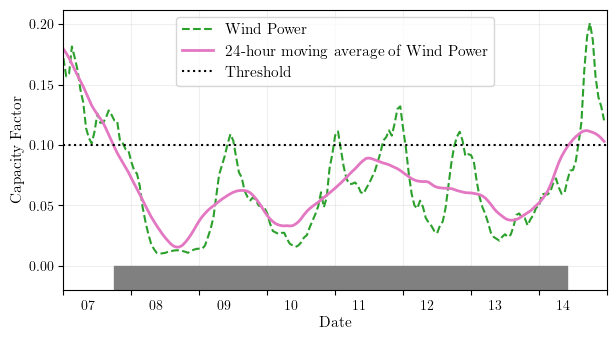

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16*cm, 9*cm))
ax.grid(alpha = 0.2, zorder = 0)

# Wind data
ax.plot(cf_wind.index, cf_wind['EirGrid'], 
        ls = '--', 
        lw = 1.5, 
        color = col, 
        label = 'Wind Power', 
        zorder = 2)
# Rolling wind data
ax.plot(cf_wind_roll.index, cf_wind_roll['EirGrid'],
        ls = '-',
        lw = 2, 
        color = col_roll, 
        label = '24-hour moving average of Wind Power ', 
        zorder = 2)
# Threhsold
ax.axhline(0.1,
           ls = ':',
           lw = 1.5,
           color='black',
           label='Threshold')
# Wind drought
ax.fill_between(cf_wind_roll.index, 0, -0.02,
                where=cf_wind_roll['EirGrid'] < 0.1, 
                color='grey', 
                zorder=2
)

# x-axis
ax.set_xlim(dt.datetime.strptime(start_date, '%Y-%m-%d'),
            dt.datetime.strptime(end_date, '%Y-%m-%d'))
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')

# Move the xtickslabels to the right
# This is correct value even if it does not look like it
trans = mtrans.Affine2D().translate(25, 0) 
for t in ax.get_xticklabels():
    t.set_transform(t.get_transform()+trans)
# Remove the last x-tick label
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
xticklabels[-1].set_visible(False)  # Hide the last label

# y-axis
ax.set_ylabel('Capacity Factor')
ax.set_ylim(-0.02)

ax.legend(loc='upper center')
fig.tight_layout()
fig.savefig('droughts_methodology.pdf', bbox_inches='tight')